In [1]:
# Load packages
import os
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap
from tqdm import tqdm

# Advanced plotting functionality with seaborn
import seaborn as sns
#import folium  #needed for interactive map
#from folium.plugins import HeatMap
#from folium.plugins import FastMarkerCluster

sns.set(style="whitegrid")  # can set style depending on how you'd like it to look

!pip install tqdm

# Importing dataset and other useful definitions

In [2]:
df = pd.read_csv('final_dataset_categoried.csv').drop(['Unnamed: 0'], axis=1)

In [3]:
df.head(5)

,Density,PercLatino,BachelorsRate,HousingUnits,TotalPop,Pop,PercAsian,PercBlack,MeanHHIncome,UnempRate,MedianHHIncome,AREA_WEIGHTED_RISK,PercWhite,ZipArea,count,minmax_count,minmax_content_amount,labels,totalContentsInsuranceCoverage
0,6333.722287,0.152896,9100.0,18910,38876,37996,0.027832,0.131598,71218.0,0.043845,51132.0,0.646319,0.787221,5.999,897.695488,0.516220,0.554188,4,215159400.0
1,5864.864865,0.170330,6504.0,9243,20748,18879,0.068874,0.127771,88894.0,0.063429,56786.0,0.513518,0.756940,3.219,1257.887442,0.723348,0.576048,4,212752400.0
2,5720.188061,0.151738,9036.0,17085,41084,40150,0.041087,0.121945,74662.0,0.046281,58624.0,0.674042,0.801894,7.019,1174.139468,0.675189,0.766426,4,298825800.0
3,5818.551279,0.111746,9197.0,12514,25200,24339,0.025437,0.027302,105106.0,0.040639,62982.0,0.585405,0.904881,4.183,1105.524743,0.635732,0.557463,4,235310300.0
4,6065.276168,0.226628,4055.0,6536,16344,15703,0.059288,0.092450,86943.0,0.042713,63695.0,0.639270,0.794787,2.589,1738.979694,1.000000,0.500628,4,183343200.0


In [4]:
final_columns=['Density',
   'MeanHHIncome',
   'BachelorsRate',
   'PercLatino',
   'HousingUnits',
   'TotalPop',
   'Pop',
   'PercAsian',
   'PercBlack',
   'UnempRate',
   'MedianHHIncome',
   'AREA_WEIGHTED_RISK',
   'PercWhite',
   'ZipArea']
targets = ['count', 'minmax_count', 'minmax_content_amount', 'labels', 'totalContentsInsuranceCoverage']

In [5]:
# display risk
def to_risk(risk):
    if risk == 0: return "low"
    if risk == 1: return "low-moderate"
    if risk == 2: return "moderate"
    if risk == 3: return "moderate-high"
    else: return "high"

In [6]:
X = df[final_columns]
y_count = df['count']
y_amount = df['totalContentsInsuranceCoverage']
y_minmax_count = df['minmax_count']
y_minmax_amount = df['minmax_content_amount']
y_labels = df['labels']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y_labels)

# Clustering Algorithms (k-means, k-NN)

## k-nearest neighbors

In [8]:
k = 10 #K-nearest — hyperparameter
perf = dict()
for k in range(1, len(df) // 5):
    clf = neighbors.KNeighborsClassifier(k, weights='distance', algorithm='ball_tree') #'auto', 'ball_tree', 'kd_tree', 'brute'
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    report = classification_report(y_test, y_pred)
    perf[k] = [float(i) for i in report.split('\n')[-2].split()[2:5]]

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/p

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/p

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/p

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/p

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/p

In [9]:
ordered_knn_params = sorted(perf.items(), key=lambda r: 1 - r[1][0])
ordered_knn_params

[(19, [0.6, 0.62, 0.58]),
 (20, [0.6, 0.64, 0.6]),
 (22, [0.6, 0.64, 0.6]),
 (21, [0.59, 0.64, 0.59]),
 (23, [0.59, 0.63, 0.58]),
 (24, [0.59, 0.64, 0.59]),
 (26, [0.59, 0.63, 0.58]),
 (15, [0.58, 0.61, 0.57]),
 (25, [0.58, 0.62, 0.57]),
 (47, [0.58, 0.61, 0.55]),
 (16, [0.57, 0.6, 0.56]),
 (17, [0.57, 0.6, 0.56]),
 (18, [0.57, 0.61, 0.57]),
 (27, [0.57, 0.61, 0.56]),
 (28, [0.57, 0.61, 0.56]),
 (48, [0.57, 0.6, 0.53]),
 (50, [0.57, 0.6, 0.53]),
 (14, [0.56, 0.6, 0.56]),
 (30, [0.56, 0.62, 0.57]),
 (32, [0.56, 0.61, 0.56]),
 (33, [0.56, 0.61, 0.56]),
 (49, [0.56, 0.59, 0.52]),
 (51, [0.56, 0.59, 0.52]),
 (52, [0.56, 0.59, 0.52]),
 (53, [0.56, 0.58, 0.51]),
 (60, [0.56, 0.59, 0.52]),
 (3, [0.55, 0.55, 0.54]),
 (9, [0.55, 0.59, 0.56]),
 (10, [0.55, 0.59, 0.56]),
 (11, [0.55, 0.6, 0.56]),
 (12, [0.55, 0.6, 0.56]),
 (29, [0.55, 0.61, 0.56]),
 (38, [0.55, 0.6, 0.54]),
 (46, [0.55, 0.61, 0.55]),
 (54, [0.55, 0.58, 0.51]),
 (63, [0.55, 0.58, 0.51]),
 (64, [0.55, 0.58, 0.51]),
 (65, [0.55, 0.5

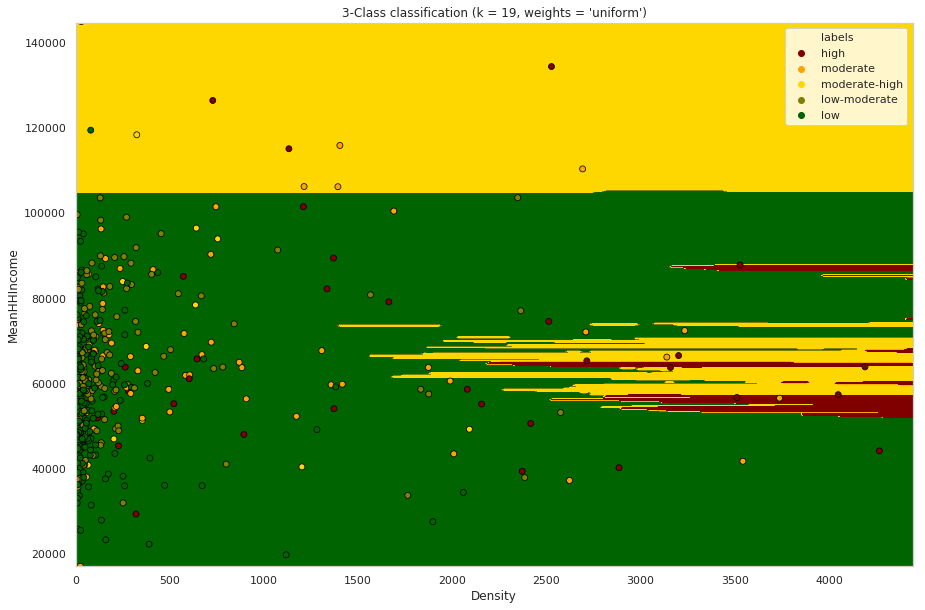

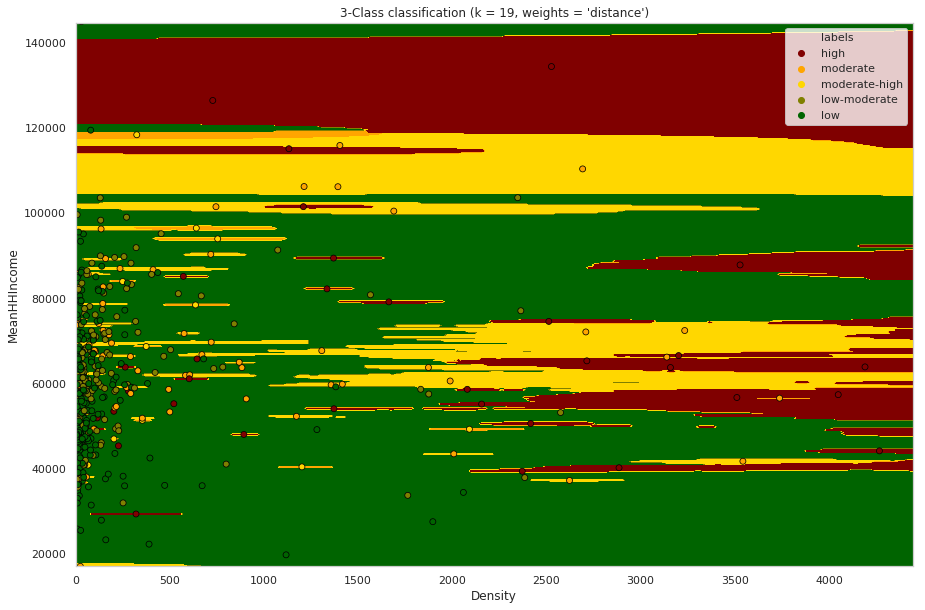

In [14]:
# seems that some k's works better than others. let's plot some results in 2D.
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
cmap_light = ListedColormap(['darkgreen', 'olive', 'gold', 'orange', 'maroon'])
cmap_bold = ['maroon', 'orange', 'gold', 'olive', 'darkgreen']#['green', 'lightgreen', 'yellow', 'coral', 'red']
weights = 'distance'
width = 500 #mesh step size
optimal_k = ordered_knn_params[0][0]

for weights in ['uniform', 'distance']:

    clf = neighbors.KNeighborsClassifier(optimal_k, weights=weights, algorithm='ball_tree') #'auto', 'ball_tree', 'kd_tree', 'brute'
    x_2d = X.values[:, :2]
    clf.fit(x_2d, y_labels)

    x_min, x_max = x_2d[:, 0].min() - 1, x_2d[:, 0].max() + 1
    y_min, y_max = x_2d[:, 1].min() - 1, x_2d[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min) / width),
                         np.arange(y_min, y_max, (y_max - y_min) / width))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(15, 10))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=x_2d[:, 0], y=x_2d[:, 1], hue=y_labels.apply(to_risk),
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max()/2)
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-Class classification (k = {optimal_k}, weights = '{weights}')")
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

It's clear that we're losing a lot of information from using a uniform weighting (plurality vote system), so our optimal kNN approach can be shown using density.

# Artificial Neural Nets (ANN)

In [12]:
(x_max - x_min) / width, width/(y_max - y_min)

(17.814612775873808, 0.0039151508507622801)